In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [16]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sb


In [3]:
data = pd.read_csv('/content/drive/MyDrive/MachinLearning/heart.csv')
x = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [5]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
pca = PCA(n_components = 2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.6407352 0.3592648]


Accuracy: 0.9180327868852459


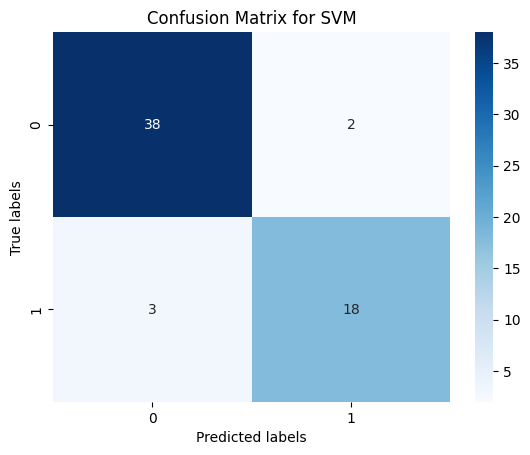

In [19]:
svm_b = SVC(kernel='linear', random_state=42, probability=True)
svm_b.fit(x_train, y_train)
y_pred = svm_b.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)

# Heatmap of the confusion matrix using Seaborn
sb.heatmap(cm, annot=True, cmap="Blues", fmt = 'd')

# Add axis labels and a title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for SVM")

# Show the plot
plt.show()

-------------------------------------------------------------------------